# Natural Language Processing

Notebook ini merupakan bagian dari buku **Fundamental Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **Bab 12 - Natural Language Processing.**

In [1]:
import re

import nltk
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

np.set_printoptions(precision=2)

In [2]:
nltk.download(["punkt", "stopwords", "wordnet", "averaged_perceptron_tagger", "universal_tagset", "maxent_ne_chunker", "words", "snowball_data"])

[nltk_data] Downloading package punkt to /home/fahmi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/fahmi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/fahmi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/fahmi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/fahmi/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/fahmi/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/fahmi/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Do

True

## Regex

In [3]:
# Pencocokan teks
re.findall('@[^\s]+', 'Follow Instagram dan Twitter saya, @fahminoorfiqri')

['@fahminoorfiqri']

In [4]:
# Penggantian teks
re.sub('[0-9]{2}', '01', 'Nomor rumah saya 10 di jalan 223 dan 3234')

'Nomor rumah saya 01 di jalan 013 dan 0101'

In [5]:
# Memisahkan teks
re.split('\s', 'Nama saya Fahmi')

['Nama', 'saya', 'Fahmi']

## Case Folding

In [6]:
# Ubah menjadi kapital
teks = "saya SUKA Buah"
print(teks.upper())
print(teks.lower())

SAYA SUKA BUAH
saya suka buah


## Tokenization

In [7]:
# Tokenisasi kalimat
dokumen = "There's a lot of bats about five feet from that cave. Bats, so many bats."
list_kalimat = nltk.tokenize.sent_tokenize(dokumen)
print(list_kalimat)

["There's a lot of bats about five feet from that cave.", 'Bats, so many bats.']


In [8]:
# Tokenisasi kata
kalimat = "There's a lot of bats about five feet from that cave"
list_kata = nltk.tokenize.word_tokenize(kalimat)
print(list_kata)

['There', "'s", 'a', 'lot', 'of', 'bats', 'about', 'five', 'feet', 'from', 'that', 'cave']


## Stopword & Punctuation Removal

In [9]:
# Daftar stopword bahasa Inggris
list_stopwords = nltk.corpus.stopwords.words('english')
print(list_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
# Hapus tanda baca
kalimat = "There's a lot of bats about five feet from that cave"
list_kata = nltk.tokenize.word_tokenize(kalimat)
list_kata = [kata for kata in list_kata if not kata in list_stopwords]
print(list_kata)

['There', "'s", 'lot', 'bats', 'five', 'feet', 'cave']


In [11]:
# Hapus stopword
list_kata = [kata for kata in list_kata if kata.isalnum()]
print(list_kata)

['There', 'lot', 'bats', 'five', 'feet', 'cave']


## Stemming

In [12]:
# Stemming menggunakan algoritma Porter
stemmer = nltk.stem.SnowballStemmer(language="english")
list_kata_stem = [stemmer.stem(kata) for kata in list_kata]
print(list_kata_stem)

['there', 'lot', 'bat', 'five', 'feet', 'cave']


## Lemmatization

In [13]:
# Lemmatize menggunakan WordNet
lemmatizer = nltk.WordNetLemmatizer()
list_kata_lemma = [lemmatizer.lemmatize(kata) for kata in list_kata]
print(list_kata_lemma)

['There', 'lot', 'bat', 'five', 'foot', 'cave']


## Part of Speech (POS) Tagging

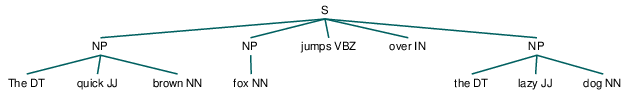

In [14]:
# Membuat tree hubungan tag
tokens = nltk.tokenize.word_tokenize("The quick brown fox jumps over the lazy dog")
tagged = nltk.pos_tag(tokens)
cp = nltk.RegexpParser("NP: {<DT>?<JJ>*<NN>}")
cp.parse(tagged)

## Named Entity Recognizer

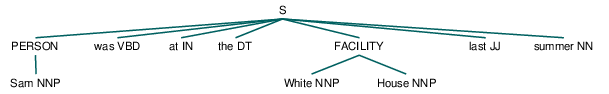

In [15]:
tokens = nltk.tokenize.word_tokenize("Sam was at the White House last summer")
tagged = nltk.pos_tag(tokens)
nltk.chunk.ne_chunk(tagged)

## Bag of Words

In [16]:
# Unigram vectorizer
vectorizer = CountVectorizer(stop_words=None)

documents = [
    "I have many cat as pets",
    "I have eight cats and two of the cats is orange"
]
doc_transformed = vectorizer.fit_transform(documents)

print(doc_transformed.toarray())
print(vectorizer.get_feature_names_out())

[[0 1 1 0 0 1 0 1 0 0 1 0 0]
 [1 0 0 2 1 1 1 0 1 1 0 1 1]]
['and' 'as' 'cat' 'cats' 'eight' 'have' 'is' 'many' 'of' 'orange' 'pets'
 'the' 'two']


In [17]:
# Bigram vectorizer
vectorizer = CountVectorizer(stop_words=None, ngram_range=(2, 2))

documents = [
    "I have many cat as pets",
    "I have eight cats and two of the cats is orange"
]
doc_transformed = vectorizer.fit_transform(documents)

print(doc_transformed.toarray())
print(vectorizer.get_feature_names_out())

[[0 1 1 0 0 0 0 1 0 1 0 0 0]
 [1 0 0 1 1 1 1 0 1 0 1 1 1]]
['and two' 'as pets' 'cat as' 'cats and' 'cats is' 'eight cats'
 'have eight' 'have many' 'is orange' 'many cat' 'of the' 'the cats'
 'two of']


## TF-IDF Vectorizer

In [18]:
# Unigram vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1))

documents = ["Fahmi has a new computer", "My cat has a new toy"]
doc_transformed = vectorizer.fit_transform(documents)

print(doc_transformed.toarray())
print(vectorizer.get_feature_names_out())

[[0.   0.58 0.58 0.41 0.   0.41 0.  ]
 [0.5  0.   0.   0.36 0.5  0.36 0.5 ]]
['cat' 'computer' 'fahmi' 'has' 'my' 'new' 'toy']
